In [ ]:
# Importing the necessary libraries
import time

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

EDA

¿Cómo se comporta la cartera de clientes domiciliados? ¿Qué patrones hay?
¿Qué tan efectivos son los diferentes bancos en el proceso de cobro?
¿Qué campañas o estrategias se podrían proponer para aumentar la efectividad del cobro?
¿Qué combinación de emisoras y estrategias ayudarían a reducir los costos?


 Tasa de éxito de cobranza
Crear una variable binaria: exito = 1 si el idRespuestaBanco es exitoso, 0 si no.

Calcular:

% de éxito general.

% de éxito por banco (idBanco), emisora (idEmisora), tipo de envío (TipoEnvio), día de emisión (Fecha_emision_cobro), etc.

% de éxito por monto (montos pequeños vs grandes).

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ListaCobroDetalle2025.csv").copy()

In [ ]:
df.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco
0,155938,738973,41396434,2,622.87,622.87,0.00,NaN,4.0
1,155938,739017,41396435,2,1069.11,1069.11,0.00,NaN,4.0
2,155939,739185,41396436,2,4340.83,4340.83,4340.83,02/01/2025,0.0
3,155940,732324,41396437,2,2134.21,2134.21,0.00,NaN,4.0
4,155940,737028,41396438,2,815.76,815.76,0.00,NaN,4.0


quiero saber si en en mi columna idRespuestaBanco en donde el valor es 0 si en mi columna fecha cobro siempre es no NA

In [ ]:
condicion = df[df['idRespuestaBanco'] == 0]['fechaCobroBanco'].isna().any()

if condicion:
    print("Hay al menos un caso con idRespuestaBanco == 0 y fechaCobroBanco es NA.")
else:
    print("En todos los casos con idRespuestaBanco == 0, fechaCobroBanco NO es NA.")


En todos los casos con idRespuestaBanco == 0, fechaCobroBanco NO es NA.


In [ ]:
df['idRespuestaBanco'].isna().sum()


np.int64(22514)

In [ ]:
df.loc[
    (df['fechaCobroBanco'].notna()) & (df['idRespuestaBanco'].isna()),
    'idRespuestaBanco'
] = 0


In [ ]:
df['idRespuestaBanco'].isna().sum()


np.int64(3778)

ahora quiero que si fechaCobroBanco	es NA y idRespuestaBanco es NA entonces idRespuestaBanco es 101

In [ ]:
df.loc[
    (df['fechaCobroBanco'].isna()) & (df['idRespuestaBanco'].isna()),
    'idRespuestaBanco'
] = 101


quiero que donde mi en mi columna df['fechaCobroBanco'] no sea NA y que en en mi columna idRespuestaBanco sea NA entonces que en idRespuestaBanco se coloque un 0

quiero encontrar que en mi columna donde idRespuestaBanco' es diferente de 0 donde hay datos que no son NA



In [ ]:
df.isna().sum()

,0
idListaCobro,0
idCredito,0
consecutivoCobro,0
idBanco,0
montoExigible,0
montoCobrar,0
montoCobrado,0
fechaCobroBanco,2025884
idRespuestaBanco,0


2025884 este numero en donde no hay fecha debe coincidir con la suma de 0's en exito  que es los 0's 2044620 y sumas los blanks

In [ ]:
df['idRespuestaBanco'].value_counts()

,count
idRespuestaBanco,
4.0,2010908
0.0,88288
13.0,5894
101.0,3778
8.0,2693
26.0,1074
3.0,699
2.0,569
1.0,143


In [ ]:
df['fechaCobroBanco'].isna().sum()

np.int64(2025884)

quiero crear una nueva columna en donde si 'idRespuestaBanco' es 0 entonces mi caso es exitoso y ponga un 1 y si es cualquier otra cosa entonces es 0

In [ ]:
import pandas as pd

# Suponiendo que tu DataFrame se llama df
df['caso_exitoso'] = df['idRespuestaBanco'].apply(lambda x: 1 if x == 0 else 0)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114172 entries, 0 to 2114171
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   idListaCobro      int64  
 1   idCredito         int64  
 2   consecutivoCobro  int64  
 3   idBanco           int64  
 4   montoExigible     float64
 5   montoCobrar       float64
 6   montoCobrado      float64
 7   fechaCobroBanco   object 
 8   idRespuestaBanco  float64
 9   caso_exitoso      int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 161.3+ MB


In [ ]:
df['fechaCobroBanco'].isna().sum()

np.int64(2025884)

In [ ]:
df['caso_exitoso'].isna().sum()

np.int64(0)

In [ ]:
df['caso_exitoso'].value_counts()

,count
caso_exitoso,
0,2025884
1,88288


<ipython-input-79-a88a253e6570>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


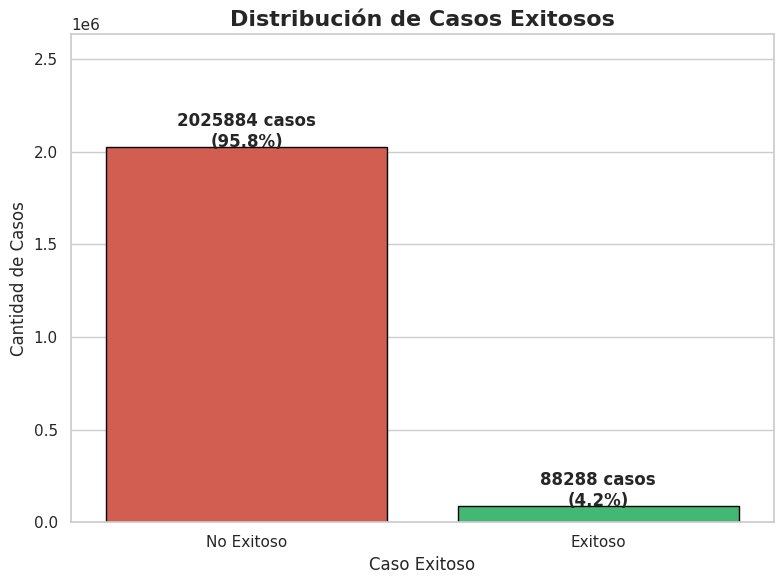

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular conteo y porcentaje
conteo = df['caso_exitoso'].value_counts().sort_index()
porcentaje = df['caso_exitoso'].value_counts(normalize=True).sort_index() * 100

# Crear DataFrame para graficar
df_plot = pd.DataFrame({
    'caso_exitoso': [0, 1],
    'conteo': conteo.values,
    'porcentaje': porcentaje.values
})

# Estilo visual bonito
sns.set(style="whitegrid")

# Colores personalizados
colores = ['#e74c3c', '#2ecc71']  # rojo para 0 (fallido), verde para 1 (exitoso)

plt.figure(figsize=(8, 6))
barplot = sns.barplot(
    data=df_plot,
    x='caso_exitoso',
    y='conteo',
    palette=colores,
    edgecolor='black'
)

# Mostrar número de casos y porcentaje sobre cada barra
for i, row in df_plot.iterrows():
    barplot.text(
        x=i,
        y=row['conteo'] + df['caso_exitoso'].max() * 3,
        s=f"{int(row['conteo'])} casos\n({row['porcentaje']:.1f}%)",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# Personalización final
plt.title('Distribución de Casos Exitosos', fontsize=16, fontweight='bold')
plt.xlabel('Caso Exitoso', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.xticks([0, 1], ['No Exitoso', 'Exitoso'], fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(0, df_plot['conteo'].max() * 1.3)
plt.tight_layout()
plt.show()


In [ ]:
df2=pd.read_csv("ListaCobro.csv")
df2
df2['idListaCobro']

,idListaCobro
0,79678
1,79746
2,80111
3,80314
4,80507
...,...
29822,162267
29823,162268
29824,162269
29825,162270


In [ ]:
df2['idListaCobro'].nunique()

29827

In [ ]:
df['idListaCobro'].value_counts().nunique()

1251

quiero saber si hay valores de mi df f['idListaCobro'] que no estan en mi df2 ['idListaCobro']

quiero que en mi df se creen 3 nuuevas columnnas  en donde la columna del df 'idListaCobro' coincida con la columna de mi df2 en 'idListaCobro' se traiga el valor de las columnas df2 en fechaCreacionLista	idBanco	fechaEnvioCobro

In [ ]:
# Seleccionamos solo las columnas necesarias de df2
df2_reducido = df2[['idListaCobro', 'fechaCreacionLista', 'idBanco', 'fechaEnvioCobro']]

# Hacemos el merge con df usando la columna 'idListaCobro'
df = df.merge(df2_reducido, on='idListaCobro', how='left')


In [ ]:
df

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,caso_exitoso,fechaCreacionLista,idBanco_y,fechaEnvioCobro
0,155938,738973,41396434,2,622.87,622.87,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025
1,155938,739017,41396435,2,1069.11,1069.11,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025
2,155939,739185,41396436,2,4340.83,4340.83,4340.83,02/01/2025,0.0,1,02/01/2025 6:11AM,2,02/01/2025
3,155940,732324,41396437,2,2134.21,2134.21,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025
4,155940,737028,41396438,2,815.76,815.76,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114167,162271,741795,44299050,2,980.32,980.32,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025
2114168,162271,741795,44299051,2,1633.86,1633.86,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025
2114169,162271,742470,44299052,2,810.44,810.44,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025
2114170,162271,742470,44299053,2,1350.74,1350.74,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025


quiero graficar donde caso_exitoso es 1 y el eje x es idBanco_x	 y en la columna se muestre la etiqueta del recuento de casos

<ipython-input-92-b3a196d4dbfe>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


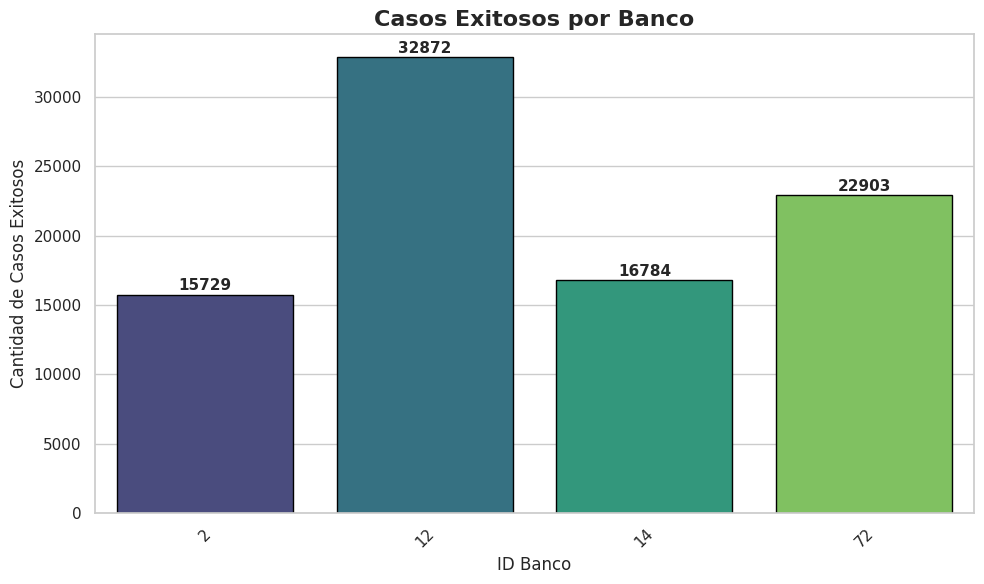

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo los casos exitosos
df_exitosos = df[df['caso_exitoso'] == 1]

# Contar los casos exitosos por banco
conteo_bancos = df_exitosos['idBanco_y'].value_counts().sort_index()

# Crear DataFrame para graficar
df_banco_plot = conteo_bancos.reset_index()
df_banco_plot.columns = ['idBanco_y', 'casos_exitosos']

# Crear gráfica
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df_banco_plot,
    x='idBanco_y',
    y='casos_exitosos',
    palette='viridis',
    edgecolor='black'
)

# Agregar etiquetas con el recuento sobre las barras
for index, row in df_banco_plot.iterrows():
    barplot.text(
        x=index,
        y=row['casos_exitosos'] + df_banco_plot['casos_exitosos'].max() * 0.01,
        s=f"{int(row['casos_exitosos'])}",
        ha='center',
        fontsize=11,
        fontweight='bold'
    )

# Estética y detalles
plt.title('Casos Exitosos por Banco', fontsize=16, fontweight='bold')
plt.xlabel('ID Banco', fontsize=12)
plt.ylabel('Cantidad de Casos Exitosos', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df3=pd.read_csv("ListaCobroEmisora.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29827 entries, 0 to 29826
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   idListaCobro  29827 non-null  int64
 1   idEmisora     29827 non-null  int64
dtypes: int64(2)
memory usage: 466.2 KB


In [ ]:
# Hacemos el merge con df usando la columna 'idListaCobro'
df = df.merge(df3, on='idListaCobro', how='left')

In [ ]:
df

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,caso_exitoso,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora
0,155938,738973,41396434,2,622.87,622.87,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5
1,155938,739017,41396435,2,1069.11,1069.11,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5
2,155939,739185,41396436,2,4340.83,4340.83,4340.83,02/01/2025,0.0,1,02/01/2025 6:11AM,2,02/01/2025,5
3,155940,732324,41396437,2,2134.21,2134.21,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5
4,155940,737028,41396438,2,815.76,815.76,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114167,162271,741795,44299050,2,980.32,980.32,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5
2114168,162271,741795,44299051,2,1633.86,1633.86,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5
2114169,162271,742470,44299052,2,810.44,810.44,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5
2114170,162271,742470,44299053,2,1350.74,1350.74,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5


In [ ]:
df['idEmisora'].value_counts()

,count
idEmisora,
6,668843
5,510279
21,424626
1,286221
17,72174
12,66234
9,39644
25,16554
2,8504


In [ ]:
df4=pd.read_excel('Libro1.xlsx')
df4

,id_estrategia,idEmisora
0,1,6
1,1,17
2,1,18
3,1,34
4,1,63
5,1,49
6,1,79
7,2,25
8,2,56
9,2,58


In [ ]:
# Hacemos el merge con df usando la columna 'idListaCobro'
df = df.merge(df4, on='idEmisora', how='left')

In [ ]:
df

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,caso_exitoso,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora,id_estrategia
0,155938,738973,41396434,2,622.87,622.87,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5,9
1,155938,739017,41396435,2,1069.11,1069.11,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5,9
2,155939,739185,41396436,2,4340.83,4340.83,4340.83,02/01/2025,0.0,1,02/01/2025 6:11AM,2,02/01/2025,5,9
3,155940,732324,41396437,2,2134.21,2134.21,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5,9
4,155940,737028,41396438,2,815.76,815.76,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114167,162271,741795,44299050,2,980.32,980.32,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9
2114168,162271,741795,44299051,2,1633.86,1633.86,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9
2114169,162271,742470,44299052,2,810.44,810.44,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9
2114170,162271,742470,44299053,2,1350.74,1350.74,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9


In [ ]:
df5= pd.read_excel('Libro2.xlsx')
df5

,id_estrategia,banco,servicio,tiempo_feedback,Hora_ inicio,Hora_fin
0,1,12,TRADICIONAL,518400,08:00:00,15:30:00
1,2,12,INTERBANCA,86400,08:00:00,15:30:00
2,3,12,PARCIAL,518400,08:00:00,15:30:00
3,4,12,MATUTINO,518400,08:00:00,15:30:00
4,5,12,EN LINEA,1800,06:00:00,20:15:00
5,6,72,EN LINEA,1800,03:00:00,17:30:00
6,7,72,TRADICIONAL,691200,03:00:00,17:30:00
7,8,72,INTERBANCA,86400,08:00:00,17:30:00
8,9,2,TRADICIONAL,1800,08:00:00,14:59:00
9,10,2,INTERBANCA,86400,08:00:00,14:59:00


In [ ]:
# Hacemos el merge con df usando la columna 'idListaCobro'
df = df.merge(df5, on='id_estrategia', how='left')

In [ ]:
df

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,caso_exitoso,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora,id_estrategia,banco,servicio,tiempo_feedback,Hora_ inicio,Hora_fin
0,155938,738973,41396434,2,622.87,622.87,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
1,155938,739017,41396435,2,1069.11,1069.11,0.00,NaN,4.0,0,02/01/2025 6:11AM,2,02/01/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
2,155939,739185,41396436,2,4340.83,4340.83,4340.83,02/01/2025,0.0,1,02/01/2025 6:11AM,2,02/01/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
3,155940,732324,41396437,2,2134.21,2134.21,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
4,155940,737028,41396438,2,815.76,815.76,0.00,NaN,4.0,0,02/01/2025 6:12AM,2,02/01/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114167,162271,741795,44299050,2,980.32,980.32,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
2114168,162271,741795,44299051,2,1633.86,1633.86,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
2114169,162271,742470,44299052,2,810.44,810.44,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00
2114170,162271,742470,44299053,2,1350.74,1350.74,0.00,NaN,4.0,0,22/05/2025 12:10PM,2,22/05/2025,5,9,2,TRADICIONAL,1800,08:00:00,14:59:00


idBanco_x es el banco que recibe y id_banco_y es el banco emisor

In [ ]:
iguales = (df['idBanco_x'] == df['idBanco_y']).all()
print("¿Todas las filas son iguales entre idBanco_x e idBanco_y?", iguales)


¿Todas las filas son iguales entre idBanco_x e idBanco_y? False


In [ ]:
diferencias = df[df['idBanco_x'] != df['idBanco_y']]
print(f"Cantidad de filas donde difieren: {len(diferencias)}")
diferencias.head()  # Muestra algunas diferencias


Cantidad de filas donde difieren: 66292


,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,caso_exitoso,fechaCreacionLista,idBanco_y,fechaEnvioCobro,idEmisora,id_estrategia,banco,servicio,tiempo_feedback,Hora_ inicio,Hora_fin
264,155958,133936,41398178,21,336.50,336.50,0.0,NaN,4.0,0,02/01/2025 9:01AM,12,02/01/2025,25,2,12,INTERBANCA,86400,08:00:00,15:30:00
265,155958,160756,41398173,44,540.15,540.15,0.0,NaN,4.0,0,02/01/2025 9:01AM,12,02/01/2025,25,2,12,INTERBANCA,86400,08:00:00,15:30:00
266,155958,273803,41398177,21,533.01,533.01,0.0,NaN,4.0,0,02/01/2025 9:01AM,12,02/01/2025,25,2,12,INTERBANCA,86400,08:00:00,15:30:00
267,155958,286960,41398175,21,542.32,542.32,0.0,NaN,4.0,0,02/01/2025 9:01AM,12,02/01/2025,25,2,12,INTERBANCA,86400,08:00:00,15:30:00
268,155958,403792,41398174,44,299.37,299.37,0.0,NaN,4.0,0,02/01/2025 9:01AM,12,02/01/2025,25,2,12,INTERBANCA,86400,08:00:00,15:30:00


In [ ]:
df.to_csv("df_new.csv", index=False, encoding='utf-8-sig')